### Motivating Experiment


### Evaluation 1: Single Worklaod

In [115]:
import numpy as np
import pandas as pd
from cProfile import label
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
%config InlineBackend.figure_format = 'retina'


def exp1_plot_throughput(workload, ylim):
    df1 = pd.read_csv('data/eval1/workload_' + workload + '_ada.csv')
    df1.rename(columns=str.strip, inplace=True)
    df2 = pd.read_csv('data/eval1/workload_' + workload + '_xov_reorder.csv')
    df2.rename(columns=str.strip, inplace=True)
    y2 = savgol_filter(df2['throughput'], 31, 3)
    df3 = pd.read_csv('data/eval1/workload_' + workload + '_xov.csv')
    df3.rename(columns=str.strip, inplace=True)
    y3 = savgol_filter(df3['throughput'], 31, 3)
    df4 = pd.read_csv('data/eval1/workload_' + workload + '_oxii.csv')
    df4.rename(columns=str.strip, inplace=True)
    y4 = savgol_filter(df4['throughput'], 31, 3)
    df5 = pd.read_csv('data/eval1/workload_' + workload + '_ox.csv')
    df5.rename(columns=str.strip, inplace=True)
    y5 = savgol_filter(df5['throughput'], 31, 3)

    plt.figure(figsize=(6, 4))
    plt.xlabel('Episode')
    plt.ylabel('Effective Throughput (tps)')
    plt.ylim(0, ylim)
    plt.plot(range(1, len(df1) + 1), df1['throughput'], label='AdaChain')
    plt.plot(range(1, len(df2) + 1), y2, label='XOV+reorder')
    plt.plot(range(1, len(df3) + 1), y3, label='XOV')
    plt.plot(range(1, len(df4) + 1), y4, label='OXII')
    plt.plot(range(1, len(df5) + 1), y5, label='OX')
    plt.grid(True)
    plt.legend(frameon=False)

##### Workload A: XOV+reorder
```json 
{
   "write_ratio": 0.2,
   "hot_key_ratio": 0.95,
   "num_keys": 10000,
   "num_hot_keys": 5,
   "trans_per_interval": 300,
   "interval": 50000,
   "execution_delay": 5000
}
```

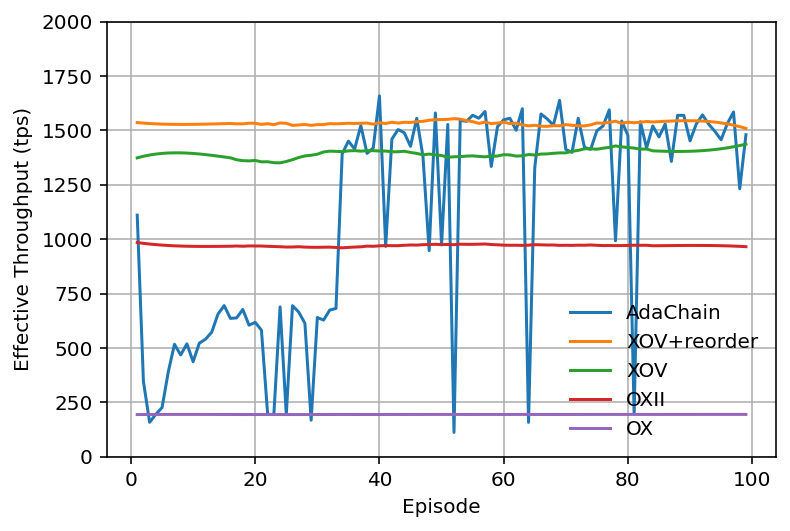

In [116]:
exp1_plot_throughput('a', 2000)

##### Workload B: OXII
```json
{
   "write_ratio": 0.5,
   "hot_key_ratio": 0.99,
   "num_keys": 10000,
   "num_hot_keys": 10,
   "trans_per_interval": 100,
   "interval": 50000,
   "execution_delay": 1000
}
```

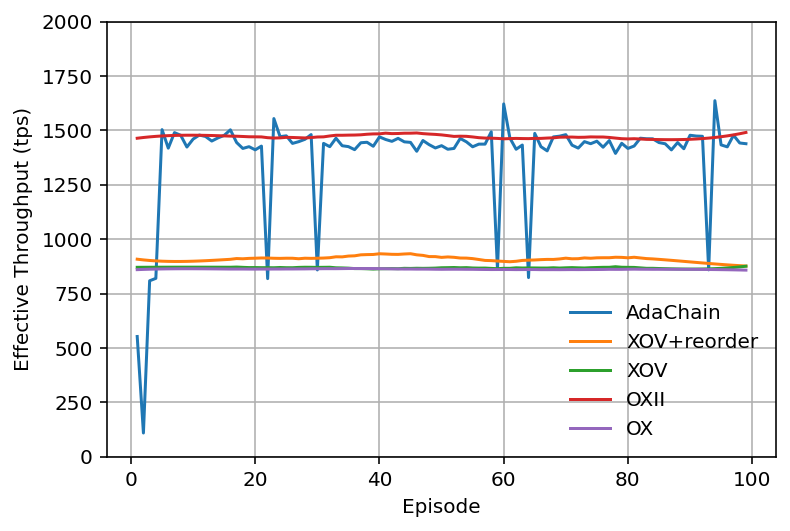

In [20]:
exp1_plot_throughput('b', 2000)

##### Workload C: XOV
```json
{
   "write_ratio": 0.5,
   "hot_key_ratio": 0.1,
   "num_keys": 10000,
   "num_hot_keys": 10,
   "trans_per_interval": 300,
   "interval": 50000,
   "execution_delay": 10000
}
```

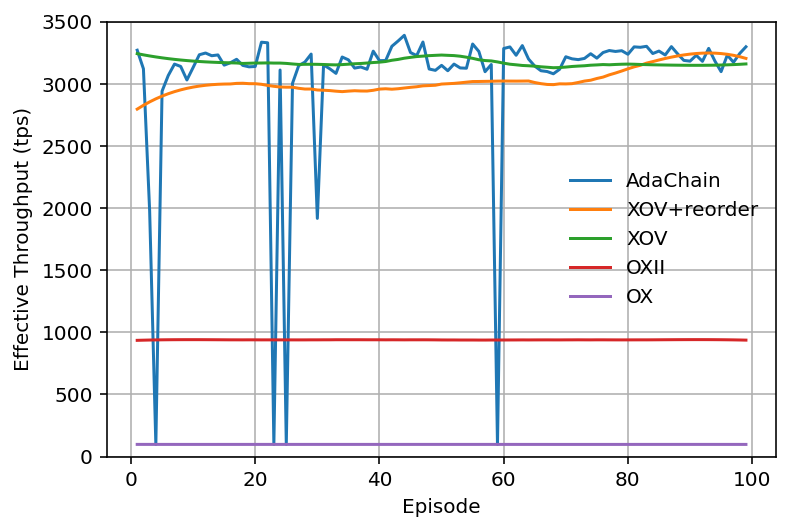

In [22]:
exp1_plot_throughput('c', 3500)

##### Workload D: OX / StreamChain
```json
{
   "write_ratio": 0.9,
   "hot_key_ratio": 0.95,
   "num_keys": 10000,
   "num_hot_keys": 1,
   "trans_per_interval": 100,
   "interval": 50000,
   "execution_delay": 0
}
```

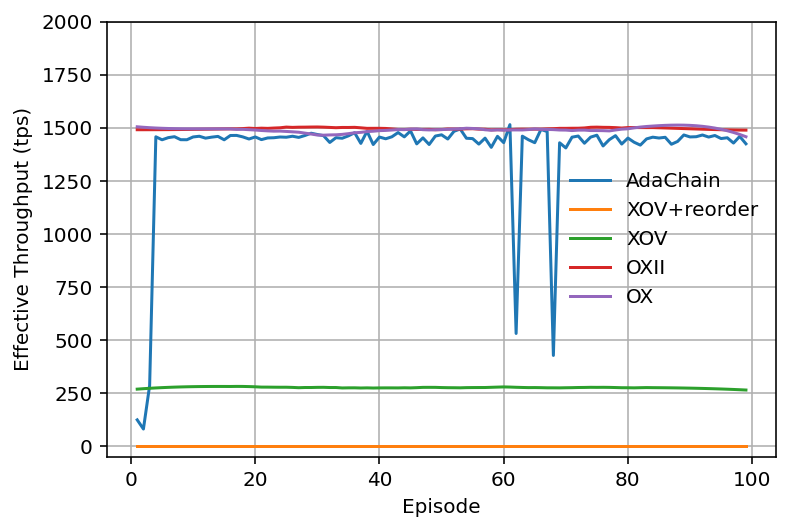

In [5]:
exp1_plot_throughput('d', 2000)

### Evaluation 2: Switch Workload

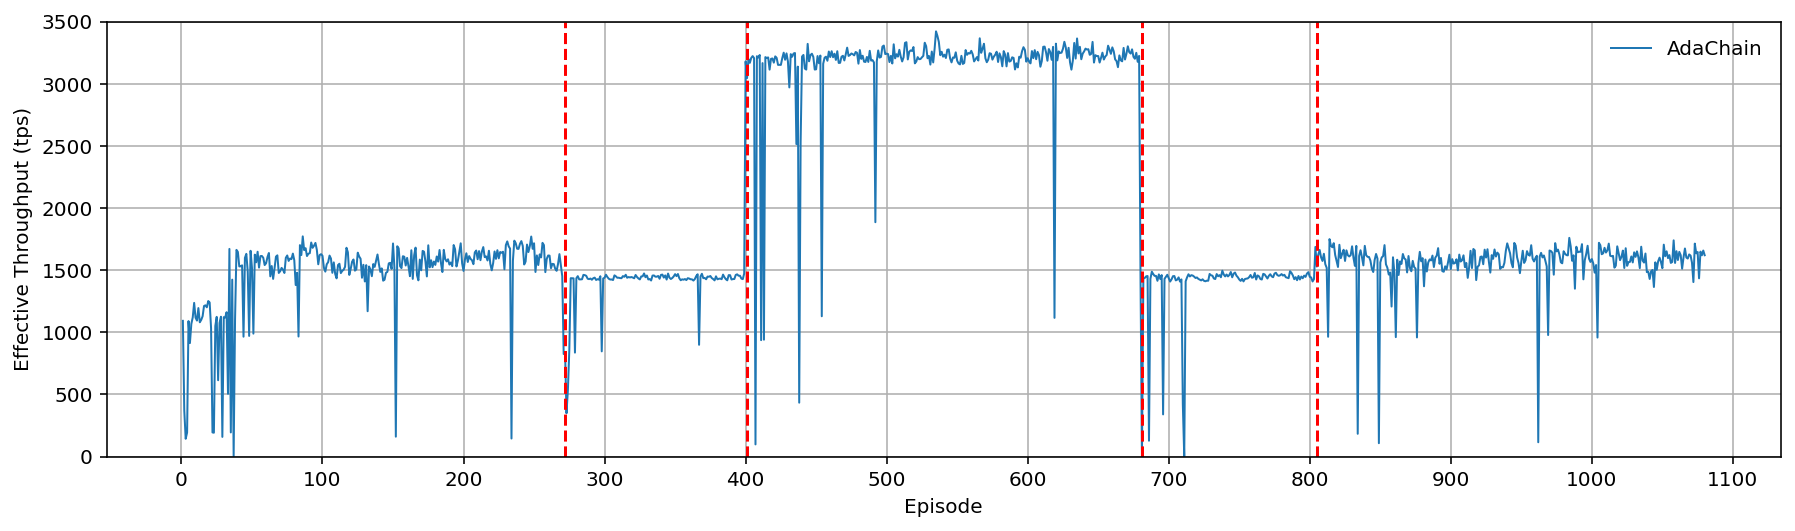

In [127]:
df = pd.read_csv('data/eval2/ts_eval_2_window_no.csv')
df.rename(columns=str.strip, inplace=True)

plt.figure(figsize=(15, 4))
plt.xlabel('Episode')
plt.ylabel('Effective Throughput (tps)')
plt.xticks(np.arange(0, 1500, 100))
plt.ylim(0, 3500)
plt.plot(range(1, len(df) + 1), df['throughput'], label='AdaChain', linewidth=1)
plt.axvline(x=272, color="red", linestyle="--")
plt.axvline(x=401, color="red", linestyle="--")
plt.axvline(x=681, color="red", linestyle="--")
plt.axvline(x=805, color="red", linestyle="--")
plt.grid(True)
plt.legend(frameon=False)
# effective transactions entire run = 6378962. + effective transactions entire run = 1348288.


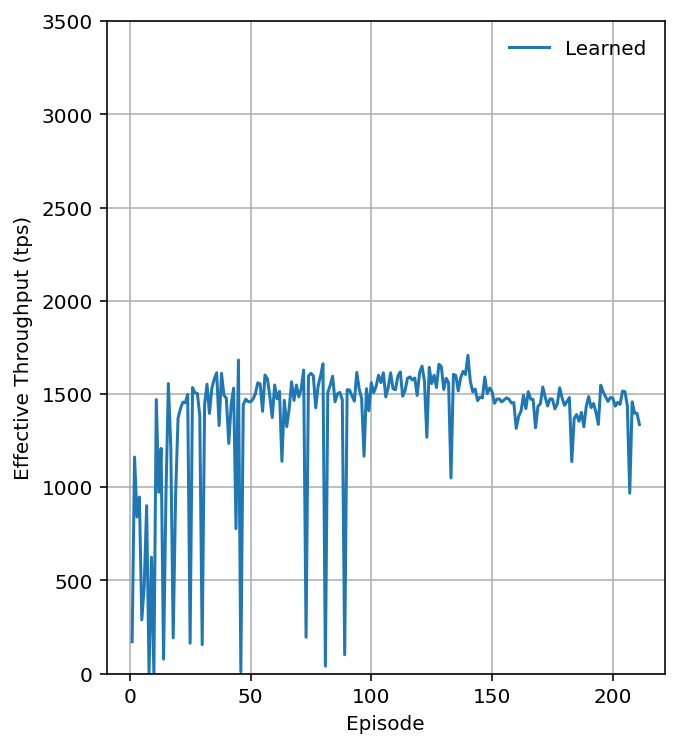

In [10]:
df = pd.read_csv('data/eval2/ts_eval_2_first_10_random.csv')
df.rename(columns=str.strip, inplace=True)

plt.figure(figsize=(5, 6))
plt.xlabel('Episode')
plt.ylabel('Effective Throughput (tps)')
plt.ylim(0, 3500)
plt.plot(range(1, len(df) + 1), df['throughput'], label='Learned')
plt.grid(True)
plt.legend(frameon=False)


In [ ]:
# XOV+reorder: effective transactions entire run = 4767552.
# XOV: effective transactions entire run = 6603633.
# OXII: effective transactions entire run = 5347319.
# OX: effective transactions entire run = 874067.

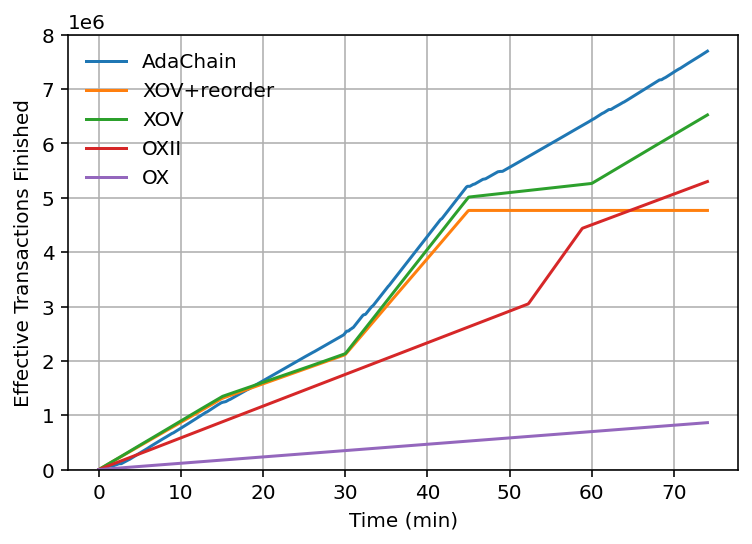

In [94]:
df1 = pd.read_csv('data/eval2/ts_eval_2_window_no.csv')
df1.rename(columns=str.strip, inplace=True)
df2 = pd.read_csv('data/eval2/eval2_xov_reorder.csv')
df3 = pd.read_csv('data/eval2/eval2_xov.csv')
df4 = pd.read_csv('data/eval2/eval2_oxii.csv')
df5 = pd.read_csv('data/eval2/eval2_ox.csv')

real_duration = []
for i in range(len(df1)):
    if i < len(df1) - 1:
        real_duration.append(df1['episode_duration (s)'][i] + df1['feature_extraction_overhead (s)'][i + 1] +
                             df1['training_overhead (s)'][i + 1] + df1['inference_overhead (s)'][i + 1] +
                             df1['communication_overhead (s)'][i + 1])
    else:
        real_duration.append(df1['episode_duration (s)'][i])
real_duration_array = np.array(real_duration)
throughput_array = df1['throughput'].values
cum_transactions = np.cumsum(throughput_array * real_duration_array)
cum_duration = np.cumsum(real_duration_array)
y_ada = []
for i in range(0, 75 * 60 - 50, 5):
    index = np.argmax(cum_duration >= i)
    if index >= 1:
        y_ada.append(cum_transactions[index - 1] + throughput_array[index] * (i - cum_duration[index - 1]))
    else: 
        y_ada.append(0)

cum_duration = df2['cum_duration'].values
throughput_array = df2['throughput'].values
real_duration_array = np.append(np.diff(cum_duration), 5)
cum_transactions = np.cumsum(throughput_array * real_duration_array)
y_xov_reorder = []
for i in range(0, 75 * 60 - 50, 5):
    index = np.argmax(cum_duration >= i)
    if index >= 1:
        y_xov_reorder.append(cum_transactions[index - 1] + throughput_array[index] * (i - cum_duration[index - 1]))
    else:
        y_xov_reorder.append(0)

cum_duration = df3['cum_duration'].values
throughput_array = df3['throughput'].values
real_duration_array = np.append(np.diff(cum_duration), 5)
cum_transactions = np.cumsum(throughput_array * real_duration_array)
y_xov = []
for i in range(0, 75 * 60 - 50, 5):
    index = np.argmax(cum_duration >= i)
    if index >= 1:
        y_xov.append(cum_transactions[index - 1] + throughput_array[index] * (i - cum_duration[index - 1]))
    else:
        y_xov.append(0)

cum_duration = df4['cum_duration'].values
throughput_array = df4['throughput'].values
real_duration_array = np.append(np.diff(cum_duration), 5)
cum_transactions = np.cumsum(throughput_array * real_duration_array)
y_oxii = []
for i in range(0, 75 * 60 - 50, 5):
    index = np.argmax(cum_duration >= i)
    if index >= 1:
        y_oxii.append(cum_transactions[index - 1] + throughput_array[index] * (i - cum_duration[index - 1]))
    else:
        y_oxii.append(0)

cum_duration = df5['cum_duration'].values
throughput_array = df5['throughput'].values
real_duration_array = np.append(np.diff(cum_duration), 5)
cum_transactions = np.cumsum(throughput_array * real_duration_array)
y_ox = []
for i in range(0, 75 * 60 - 50, 5):
    index = np.argmax(cum_duration >= i)
    if index >= 1:
        y_ox.append(cum_transactions[index - 1] + throughput_array[index] * (i - cum_duration[index - 1]))
    else:
        y_ox.append(0)


plt.figure(figsize=(6, 4))
plt.xlabel('Time (min)')
plt.ylabel('Effective Transactions Finished')
plt.ylim(0, 8e6)
x = [i / 60 for i in range(0, 75 * 60 - 50, 5)]
plt.plot(x, y_ada, label='AdaChain')
plt.plot(x, y_xov_reorder, label='XOV+reorder')
plt.plot(x, y_xov, label='XOV')
plt.plot(x, y_oxii, label='OXII')
plt.plot(x, y_ox, label='OX')
plt.grid(True)
plt.legend(frameon=False)
